# Function and class definitions:

## import Libraries and define parameters

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import FS3
import Plot_definitions as pld
import Collected_runs as cr

mpl.rcParams.update(
    {
        "text.usetex": False,
        "font.family": "serif",
        "font.serif": "cmr10",
        "mathtext.fontset": "cm",
        "font.family": "STIXGeneral",
        "axes.unicode_minus": True,
        "axes.labelsize": 21,
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.fontsize": 16,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "xtick.major.top": "on",
        "xtick.major.bottom": "on",
        "ytick.major.left": "on",
        "ytick.major.right": "on",
        "xtick.top": True,
        "ytick.right": True,
    }
)

/home/daniel/Master_thesis/Codes/Analysis/Plot_definitions.py:253: SyntaxWarning: invalid escape sequence '\,'
  """


### Write Data for FS3.py format

In [ ]:
path_to_dataT = "/home/daniel/Master_thesis_new/runs_sweep_Ts00"
runT = cr.collected_runs(path_to_dataT, True, cutoff=0)
runT.write_to_FS3_file(suffix="_Ts00")

In [ ]:
data = FS3.load(
    "/home/daniel/Master_thesis_new/dataT/spin_stiffnessruns_SPIN_CORR_TEST.dat",
    LIndex=0,
    xIndex=1,
    yIndex=2,
    dyIndex=3,
)
FS3.setStyle(Llist=np.sort(list(data), axis=0))

fig, ax0 = FS3.figure(xlabel=r"$T$", ylabel=r"$U_2$")
xrange = FS3.getDataRange(data, idx=0, margin=0.05)
ax0.set_xlim(1.2,1.4)
#ax0.set_ylim(0, 1)
FS3.setTicks(ax0, minorxTicks=2, minoryTicks=2)
plots = []
labels = []
for L in np.sort(list(data), axis=0):
    p = ax0.errorbar(
        data[L][:, 0],
        data[L][:, 1],
        yerr=data[L][:, 2],
        **FS3.errorbarStyle(L),
        linestyle=""
    )
    ax0.plot(data[L][:, 0], data[L][:, 1], **FS3.plotStyle(L), linestyle="-")
    plots.append(p)
    labels.append(r"$L = %s$" % L)
FS3.legend(ax0, plots, labels, legendLabelBreak=7, loc=(0.74, 0.72, 0.18))

data = FS3.select(data, gRange=[1.3, 1.4])
FS3.setStyle(Llist=np.sort(list(data), axis=0))

fitFunction = pld.f1()
fitFunction.polyOrder = 3

g0 = 1.34
nu0 = 1.0

params0 = np.hstack(
    (
        [g0 + np.random.randn() * 0.01, nu0 + np.random.randn() * 0.01],
        0.01 * np.random.randn(fitFunction.nparams() - 2),
    )
)
res = FS3.fit_minimize(data, fitFunction, params=params0, **{"method": "BFGS"})
params, dparams, redChi2, mesg, ierr = res

FS3.fitSummary(fitFunction, res)

# main panel, crossings
var = fitFunction.unpack(params)
fig, ax0 = FS3.figure(xlabel=r"$T$", ylabel=r"$U_2$")
xrange, yrange = FS3.getDataRange(data, idx=0, margin=0.05), FS3.getDataRange(
    data, idx=1, margin=0.05
)
yrange[1] = 1.05 * yrange[1]
ax0.set_xlim(xrange)
ax0.set_ylim(yrange)
FS3.setTicks(ax0, minorxTicks=2, minoryTicks=2)
plots = []
labels = []
for L in np.sort(list(data), axis=0):
    p = ax0.errorbar(
        data[L][:, 0],
        data[L][:, 1],
        yerr=data[L][:, 2],
        **FS3.errorbarStyle(L),
        linestyle=""
    )
    plots.append(p)
    labels.append(r"$L = %s$" % L)
    plotRange = FS3.getDataRange(data[L], idx=0, margin=0.05)
    g = np.linspace(plotRange[0], plotRange[1], 400)
    ax0.plot(g, fitFunction.func(g, L, params), **FS3.plotStyle(L))
FS3.legend(ax0, plots, labels, legendLabelBreak=7, loc=(0.78, 0.02, 0.18))
ax0.axhline(var["a"][0], color="#dddddd", zorder=-1000)
ax0.axvline(var["gc"], color="#dddddd", zorder=-1000)

# inset (data collapse)

fig, ax1 = FS3.addInset(fig, loc=3)
ax1.set_xlabel(r"$(T-T_c)\, L^{1/\nu}$")
dataCollapse = FS3.rescaleAxis(
    data,
    xfunc="(x-gc)*L**(1./nu) + c*L**(omega/nu)",
    yfunc="y",
    arg={"nu": var["nu"], "gc": var["gc"], "omega": var["omega"], "c": var["c"]},
)
for L in np.sort(list(data), axis=0):
    ax1.errorbar(
        dataCollapse[L][:, 0],
        dataCollapse[L][:, 1],
        yerr=dataCollapse[L][:, 2],
        **FS3.errorbarStyle(L),
        linestyle=""
    )
ax1.axhline(var["a"][0], color="#dddddd")
ax1.axvline(0, color="#dddddd")

Get Data

In [17]:
sandvik_fig64 = pd.read_csv("/home/daniel/Master_thesis/Data/sandvik_fig64.csv",header=0, sep=",")

sandvik_x = sandvik_fig64["x"]
sandvik_y = sandvik_fig64["y"]

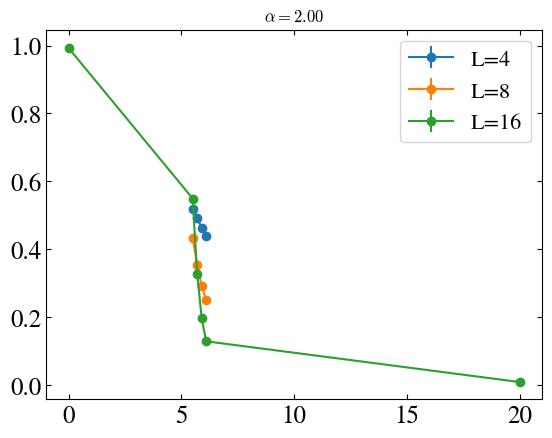

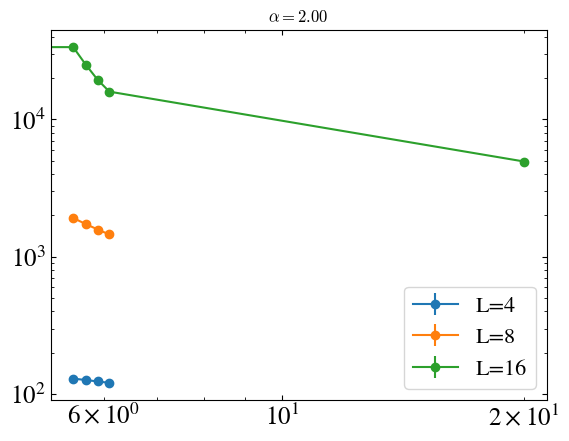

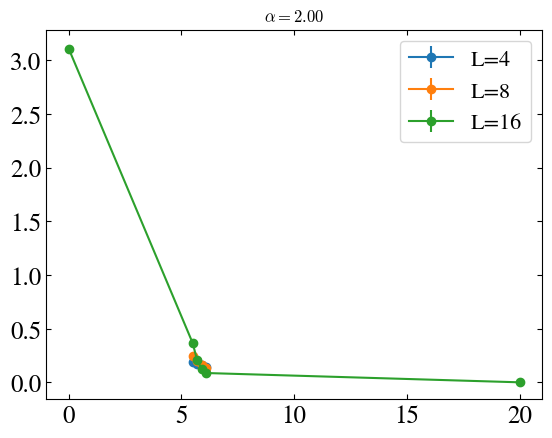

In [ ]:
path_to_dataT = "/home/daniel/Master_thesis/Data/runs_SPIN_CORR_J"

cl_runs = cr.collected_runs(path_to_dataT, True, cutoff=1)
#run.write_to_FS3_file(suffix=path_to_dataT.split("/")[-1])

cl_runs.plot_obs("binder")
cl_runs.plot_obs("susceptibility_stag",y_factor= lambda L,N: 1.0, xscale="linear", yscale="log")
cl_runs.plot_obs("spin_stiffness",y_factor= lambda L,N: 1.0)
#plt.errorbar(tab[4][0], tab[4][1], yerr=tab[4][2], fmt='o', label='Simulation data', markersize=4)
#plt.plot(sandvik_x, sandvik_y, 'o', label='Sandvik et al. Fig. 6.4 data', markersize=4)


<ErrorbarContainer object of 3 artists>

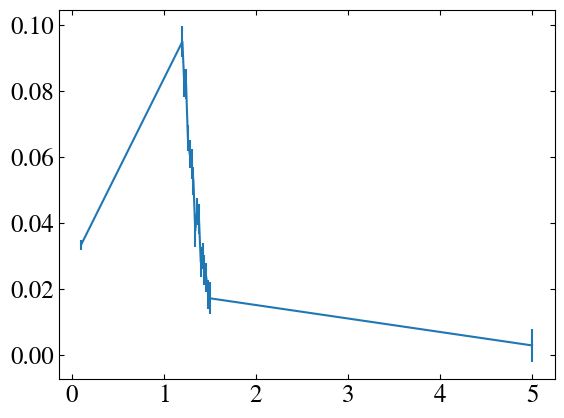

In [121]:
dic = cl_runs.L_dict

T = []
C = []
Cerr = []

for run in dic[16]:
    T.append(run.g_param)
    C.append(run.get_Spin_correletion()["AA"][0][-1])
    Cerr.append(run.get_Spin_correletion()["AA"][1][-1])

plt.errorbar(T,C,Cerr)
    


In [ ]:


run = cr.collected_runs(path_to_dataT, False, cutoff=0)

diag_avg = []
diag_err = []
vert_avg = []
vert_err = []
loop_avg = []
loop_err = []
measure_avg = []
measure_err = []
saving_avg = []
saving_err = []
total_avg = []
total_err = []

temp = []

single_run = run.runs[1]
path = single_run.path_to_run+"/output_files/time.csv"
dic = pd.read_csv(path,header=1, sep=";")

bins = dic["Bin"].to_numpy()
total = dic["Total"].to_numpy()
diag = dic["Diagonal_update"].to_numpy()
vert = dic["Vertex_list"].to_numpy()
loop = dic["Loop_update"].to_numpy()
measure = dic["Measurement"].to_numpy()
saving = dic["Saving"].to_numpy()

temp.append(single_run.params["T"])

diag_avg.append(np.mean(diag))
diag_err.append(np.std(diag)/np.sqrt(len(diag)))
vert_avg.append(np.mean(vert))
vert_err.append(np.std(vert)/np.sqrt(len(vert)))
loop_avg.append(np.mean(loop))
loop_err.append(np.std(loop)/np.sqrt(len(loop)))
measure_avg.append(np.mean(measure))
measure_err.append(np.std(measure)/np.sqrt(len(measure)))
saving_avg.append(np.mean(saving))
saving_err.append(np.std(saving)/np.sqrt(len(saving)))

# plt.errorbar(temp,diag_avg,yerr=diag_err,marker="o",linestyle="-",label="Diagonal update")
# plt.errorbar(temp,vert_avg,yerr=vert_err,marker="o",linestyle="-",label="Vertex list")
# plt.errorbar(temp,loop_avg,yerr=loop_err,marker="o",linestyle="-",label="Loop update")
# plt.errorbar(temp,measure_avg,yerr=measure_err,marker="o",linestyle="-",label="Measurement")
# plt.errorbar(temp,saving_avg,yerr=saving_err,marker="o",linestyle="-",label="Saving")

# plt.xlabel("T")
# plt.ylabel("Fraction of total time")
# plt.legend()

plt.fill_between(bins,diag,alpha=0.5)
plt.plot(bins,diag)

plt.fill_between(bins,diag,diag+vert,alpha=0.5)
plt.plot(bins,diag+vert)

plt.fill_between(bins,diag+vert,diag+vert+loop,alpha=0.5)
plt.plot(bins,diag+vert+loop)

plt.fill_between(bins,diag+vert+loop,diag+vert+loop+measure,alpha=0.5)
plt.plot(bins,diag+vert+loop+measure)

plt.fill_between(bins,diag+vert+loop+measure,diag+vert+loop+measure+saving,alpha=0.5)
plt.plot(bins,diag+vert+loop+measure+saving)

plt.plot(bins,total,'k--')


In [ ]:
single_run = run.runs[0]
path = single_run.path_to_run
print(single_run.params["T"])

dict = pd.read_csv(
    path + "/output_files/spin_corrX.csv", header=None, sep=";", skiprows=5
)

C_AA = []
C_AA_err = []
C_AB = []
C_AB_err = []
C_BA = []
C_BA_err = []
C_BB = []
C_BB_err = []

for i in range(1, len(dict.columns), 4):

    avg = np.mean(dict[i].to_numpy())
    err = np.std(dict[i].to_numpy()) / np.sqrt(len(dict[i].to_numpy()))
    C_AA.append(avg)
    C_AA_err.append(err)

    avg = np.mean(dict[i + 1].to_numpy())
    err = np.std(dict[i + 1].to_numpy()) / np.sqrt(len(dict[i + 1].to_numpy()))
    C_AB.append(avg)
    C_AB_err.append(err)

    avg = np.mean(dict[i + 2].to_numpy())
    err = np.std(dict[i + 2].to_numpy()) / np.sqrt(len(dict[i + 2].to_numpy()))
    C_BA.append(avg)
    C_BA_err.append(err)

    avg = np.mean(dict[i + 3].to_numpy())
    err = np.std(dict[i + 3].to_numpy()) / np.sqrt(len(dict[i + 3].to_numpy()))
    C_BB.append(avg)
    C_BB_err.append(err)

plt.errorbar(
    range(len(C_AA)), C_AA, yerr=C_AA_err, marker="o", linestyle="-", label="AF"
)
# plt.errorbar(range(len(C_AB)),C_AB,yerr=C_AB_err,marker="o",linestyle="-",label="C_AB")
# plt.errorbar(range(len(C_BA)),C_BA,yerr=C_BA_err,marker="o",linestyle="-",label="C_BA")
# plt.errorbar(range(len(C_BB)),C_BB,yerr=C_BB_err,marker="o",linestyle="-",label="C_BB")

single_run = run.runs[8]
path = single_run.path_to_run
print(single_run.params["T"])

dict = pd.read_csv(
    path + "/output_files/spin_corrX.csv", header=None, sep=";", skiprows=5
)

C_AA = []
C_AA_err = []
C_AB = []
C_AB_err = []
C_BA = []
C_BA_err = []
C_BB = []
C_BB_err = []

for i in range(1, len(dict.columns), 4):

    avg = np.mean(dict[i].to_numpy())
    err = np.std(dict[i].to_numpy()) / np.sqrt(len(dict[i].to_numpy()))
    C_AA.append(avg)
    C_AA_err.append(err)

    avg = np.mean(dict[i + 1].to_numpy())
    err = np.std(dict[i + 1].to_numpy()) / np.sqrt(len(dict[i + 1].to_numpy()))
    C_AB.append(avg)
    C_AB_err.append(err)

    avg = np.mean(dict[i + 2].to_numpy())
    err = np.std(dict[i + 2].to_numpy()) / np.sqrt(len(dict[i + 2].to_numpy()))
    C_BA.append(avg)
    C_BA_err.append(err)

    avg = np.mean(dict[i + 3].to_numpy())
    err = np.std(dict[i + 3].to_numpy()) / np.sqrt(len(dict[i + 3].to_numpy()))
    C_BB.append(avg)
    C_BB_err.append(err)

plt.errorbar(
    range(len(C_AA)), C_AA, yerr=C_AA_err, marker="o", linestyle="-", label="CRIT"
)
# plt.errorbar(
#     range(len(C_AB)), C_AB, yerr=C_AB_err, marker="o", linestyle="-", label="C_AB"
# )
# plt.errorbar(
#     range(len(C_BA)), C_BA, yerr=C_BA_err, marker="o", linestyle="-", label="C_BA"
# )
# plt.errorbar(
#     range(len(C_BB)), C_BB, yerr=C_BB_err, marker="o", linestyle="-", label="C_BB"
# )

single_run = run.runs[-1]
path = single_run.path_to_run
print(single_run.params["T"])

dict = pd.read_csv(
    path + "/output_files/spin_corrX.csv", header=None, sep=";", skiprows=5
)

C_AA = []
C_AA_err = []
C_AB = []
C_AB_err = []
C_BA = []
C_BA_err = []
C_BB = []
C_BB_err = []

for i in range(1, len(dict.columns), 4):

    avg = np.mean(dict[i].to_numpy())
    err = np.std(dict[i].to_numpy()) / np.sqrt(len(dict[i].to_numpy()))
    C_AA.append(avg)
    C_AA_err.append(err)

    avg = np.mean(dict[i + 1].to_numpy())
    err = np.std(dict[i + 1].to_numpy()) / np.sqrt(len(dict[i + 1].to_numpy()))
    C_AB.append(avg)
    C_AB_err.append(err)

    avg = np.mean(dict[i + 2].to_numpy())
    err = np.std(dict[i + 2].to_numpy()) / np.sqrt(len(dict[i + 2].to_numpy()))
    C_BA.append(avg)
    C_BA_err.append(err)

    avg = np.mean(dict[i + 3].to_numpy())
    err = np.std(dict[i + 3].to_numpy()) / np.sqrt(len(dict[i + 3].to_numpy()))
    C_BB.append(avg)
    C_BB_err.append(err)

plt.errorbar(
    range(len(C_AA)), C_AA, yerr=C_AA_err, marker="o", linestyle="-", label="PM"
)


plt.xlabel("Distance")
plt.ylabel("Spin correlation")
plt.xscale("log")
plt.yscale("log")
plt.legend()

In [ ]:
print("Hello World")